# Lightspeed introduction to `pandas`

Pandas is the library providing tools to crunch data simply.

It mainly provides a `DataFrame` object

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame({ 
    'A' : 1.2,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series(1, dtype='float32'),
    'C' : pd.Series(1, index=[0,2], dtype='float32'),
    'D' : pd.Series([1, 2, 3, 4], dtype='int32'),
    'E' : pd.Categorical(["test", "train", "test", "train"]),
    'F' : 'foo',
    'G' : np.random.randn(4)
})
df

,A,B,C,D,E,F,G
0,1.2,2013-01-02,1.0,1,test,foo,0.802795
1,1.2,2013-01-02,NaN,2,train,foo,1.158557
2,1.2,2013-01-02,1.0,3,test,foo,-0.181826
3,1.2,2013-01-02,NaN,4,train,foo,-0.456742


In [ ]:
df.columns

In [ ]:
df.info

## Basic things

In [ ]:
# Columns can be accessed by name (when it makes sense)
df.B

In [ ]:
# Or like keys in a dict
df['B']

In [ ]:
type(df.B)

In [ ]:
# To select a list of columns
df[['A', 'C']]

In [ ]:
df.dtypes

In [ ]:
df.info()

## Groupby and aggregations

Basic syntax: group rows using the categories of a column and perform an aggregation on the groups

In [ ]:
df

In [ ]:
# Compute the sum of D for each category in E
df.groupby('E').sum().reset_index()

In [ ]:
spam = df.groupby('E').sum()
spam

# Lightspeed introduction to `seaborn`

It's a graphics library built on top of `matplotlib` which
- works pretty neatly with `pandas` `DataFrame`s
- provides simpler ways to make nice visualization of datasets

Let's illustrate this using the toy `tips` dataset that comes with `seaborn`

In [2]:
import seaborn as sns

# Load one of the data sets that comes with seaborn
tips = sns.load_dataset("tips")

# First 10 rows of the dataframe
tips.head(n=10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [3]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [4]:
tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [5]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


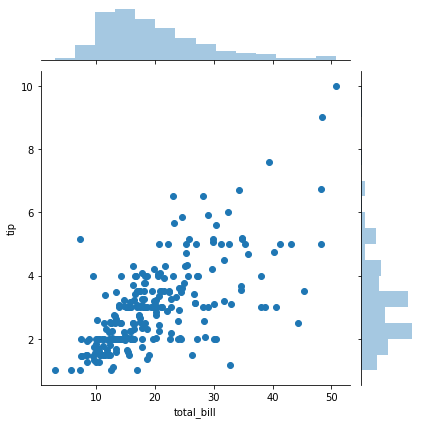

In [7]:
#sns.set_style('whitegrid')
sns.jointplot("total_bill", "tip", data=tips)

## Exercice 1

Compute the tip percentage of Dinner VS Lunch for each day of the week

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Answer

In [11]:
tips['tip_percentage'] = 100 * tips['tip'] / tips['total_bill']
tips.groupby(['time', 'day']).mean()[['tip_percentage']]

tip_percentage
time   day                 
Lunch  Thur       16.130074
       Fri        18.876489
       Sat              NaN
       Sun              NaN
Dinner Thur       15.974441
       Fri        15.891611
       Sat        15.315172
       Sun        16.689729

## Exercice 2 

Convert `size` as a categorical variable

### Answer

In [12]:
cat_size = pd.CategoricalDtype(sorted(tips['size'].unique()),ordered=True)
cat_size

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6], ordered=True)

In [14]:
# We want to deal with size as a categorical variable
tips['size'] = tips['size'].astype('category')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


## Exercice 3

One-hot encode (or "create dummies" or "binarize") the categorical variables (this can be easily achieved with the `pandas.get_dummies` function)

### Answer

In [15]:
data = pd.get_dummies(tips, prefix_sep='#')
data.head(5)

,total_bill,tip,tip_percentage,sex#Male,sex#Female,smoker#Yes,smoker#No,day#Thur,day#Fri,day#Sat,day#Sun,time#Lunch,time#Dinner,size#1,size#2,size#3,size#4,size#5,size#6
0,16.99,1.01,5.944673,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0
1,10.34,1.66,16.054159,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
2,21.01,3.50,16.658734,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
3,23.68,3.31,13.978041,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0
4,24.59,3.61,14.680765,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0


Only categorical columns have been "binarized". For instance, the `'day'` column is replaced by 4 columns named `'day#Thur'`, `'day#Fri'`, `'day#Sat'`, `'day#Sun'`, since `'day'` has 4 modalities (see next line).

In [16]:
tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

## Remark

Sums over dummies for `sex`, `smoker`, `day`, `time` and `size` are all equal to one.

- Leads to colinearities, hence bad conditioning of the features matrix
- Can be checked through a SVD (but don't compute the SVD of a large matrix!)

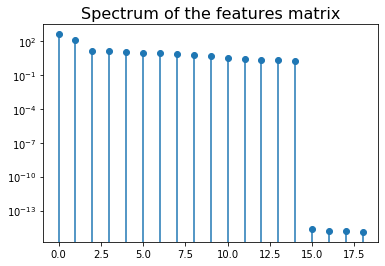

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

s = np.linalg.svd(data, compute_uv=False)
plt.yscale('log')
plt.title('Spectrum of the features matrix', fontsize=16)
_=plt.stem(s, use_line_collection=True)

In [22]:
data = pd.get_dummies(tips, prefix_sep='#', drop_first=True)
data.head()

,total_bill,tip,tip_percentage,sex#Female,smoker#No,day#Fri,day#Sat,day#Sun,time#Dinner,size#2,size#3,size#4,size#5,size#6
0,16.99,1.01,5.944673,1,1,0,0,1,1,1,0,0,0,0
1,10.34,1.66,16.054159,0,1,0,0,1,1,0,1,0,0,0
2,21.01,3.50,16.658734,0,1,0,0,1,1,0,1,0,0,0
3,23.68,3.31,13.978041,0,1,0,0,1,1,1,0,0,0,0
4,24.59,3.61,14.680765,1,1,0,0,1,1,0,0,1,0,0


Now, if a categorical feature has $K$ modalities, we use only $K-1$ dummies

In [ ]:
data.head()

## Exercice 4

Normalize the continuous features

### Answer

In [ ]:
def normalize_min_max(columns, data):
    """Min-max scale columns in data

    Parameters
    ----------
    columns : `List[str]`
        A list of columns to min-max scale

    data : `pandas.DataFrame`
        A dataframe containing the given columns

    Returns
    -------
    output : `None`
        data is modified inplace and not return by the fonction
    """
    min_max = data[columns].agg(['min', 'max'])
    for col in columns:
        data[col] -= min_max.loc['min', col]
        data[col] /= (min_max.loc['max', col] - min_max.loc['min', col])    

In [ ]:
normalize_min_max(['total_bill', 'tip'], data)

In [ ]:
data[['total_bill', 'tip']].describe()